# Fictional Primates in Animation

### It occurred to me that a lot of older shows featured some sort of monkey as a sidekick.  Thinking of Speed Racer, there was Chim-Chim, and who can forget Darwin from The Wild Thornberries?  I decided that I needed to see what was going on.

### Let's go scrape some data.  

In [1]:
import requests
from bs4 import BeautifulSoup
import csv

### I found a Wiki Pedia page that had the information that I was looking for.

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_fictional_primates_in_animation'

### Lets scrape the data and put it into a CSV file.  I start

In [40]:
import pandas as pd
url = 'https://en.wikipedia.org/wiki/List_of_fictional_primates_in_animation'
list = pd.read_html(url)

In [49]:
print (list[3].head())

     Prosimian            Species                                  Origin  \
0      Maurice            Aye-aye                              Madagascar   
1         Momo              Lemur              Avatar: The Last Airbender   
2       Murphy             Galago  Daisougen no Chiisana Tenshi Bush Baby   
3         Mort        Mouse lemur                              Madagascar   
4  King Julien  Ring-tailed lemur                              Madagascar   

                                               Notes  
0                             King Julien's advisor.  
1                                    A winged lemur.  
2                                                NaN  
3  Small, cute and cuddly, he makes King Julien's...  
4  Self indulgent and conceited, but fun-loving k...  


### Cleaning up the tables and joining them

In [50]:
import pandas as pd 

tableA = list[1]
tableB = list[2]
tableC = list[3]

#rename the monkey column to ape
tableB = tableB.rename(columns={"Monkey": "Ape"})
tableC = tableC.rename(columns={"Prosimian": "Ape"})



In [51]:
#join tableA and tableB
joinedTable = pd.concat([tableA, tableB, tableC], ignore_index=True, sort=False)

#drop any duplicate rows
joinedTable.drop_duplicates(inplace=True)

#print the joined table
print(joinedTable)

# Wow, thats a lot of primates!

               Ape            Species                                  Origin  \
0            Bingo            Gorilla                           Banana Splits   
1             Bobo         Chimpanzee                            Kim Possible   
2        Bobo Haha         Chimpanzee                           Generator Rex   
3            Booby         Chimpanzee                                  Perman   
4   Charles Simian         Chimpanzee    Captain Simian and the Space Monkeys   
..             ...                ...                                     ...   
67         Maurice            Aye-aye                              Madagascar   
68            Momo              Lemur              Avatar: The Last Airbender   
69          Murphy             Galago  Daisougen no Chiisana Tenshi Bush Baby   
70            Mort        Mouse lemur                              Madagascar   
71     King Julien  Ring-tailed lemur                              Madagascar   

                           

In [52]:
# put all the data into one csv file
joinedTable.to_csv('AnimatedApes.csv', index=False)

### Now we have the data in a .CSV file that is ready to be manipulated.

# Into the DataBase...

### I want to be able to manipulate this table using SQL.  Lets put it into an IBM - DB2 database.

In [58]:
import ibm_db
import csv
from name import * # This will keep my credential secret!

### Connecting to the database.

In [59]:
dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_protocol = "TCPIP"            # i.e. "TCPIP"
dsn_security = "SSL"              #i.e. "SSL"   - # Establish connection to the database


In [60]:
# Create the dsn connection string
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};"
    "SECURITY={7};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd,dsn_security)

In [61]:
# Create database connection
try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )


Connected to database:  BLUDB as user:  xwj77390 on host:  2f3279a5-73d1-4859-88f0-a6c3e6b4b907.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud


### Once we have connected to the database we need to create the table.

In [15]:
# Create table PRIMATES
sql = 'CREATE TABLE PRIMATES (Ape VARCHAR(255) NOT NULL, Species VARCHAR(255) NOT NULL, Origin VARCHAR(255) NOT NULL, Notes VARCHAR(255))'
stmt = ibm_db.exec_immediate(conn, sql)

### Now lets get the data into the table.

In [55]:
# Insert data into table PRIMATES
with open('AnimatedApes.csv', 'r') as csv_file:
    reader = csv.reader(csv_file)
    print(reader)
    next(reader) # Skip header row
    for row in reader:
        ape = row[0]
        species = row[1]
        origin = row[2]
        notes = row[3]
        sql = "INSERT INTO PRIMATES (Ape, Species, Origin, Notes) VALUES (?,?,?,?)";
        stmt = ibm_db.prepare(conn, sql);
        ibm_db.bind_param(stmt, 1, ape);
        ibm_db.bind_param(stmt, 2, species);
        ibm_db.bind_param(stmt, 3, origin);
        ibm_db.bind_param(stmt, 4, notes);
        ibm_db.execute(stmt);

In [63]:
# Close the connection
ibm_db.close(conn)

True

### Checking the DB2 database shows the following result

##### Awesome! Next we will be doing some analysis on the data we collected.

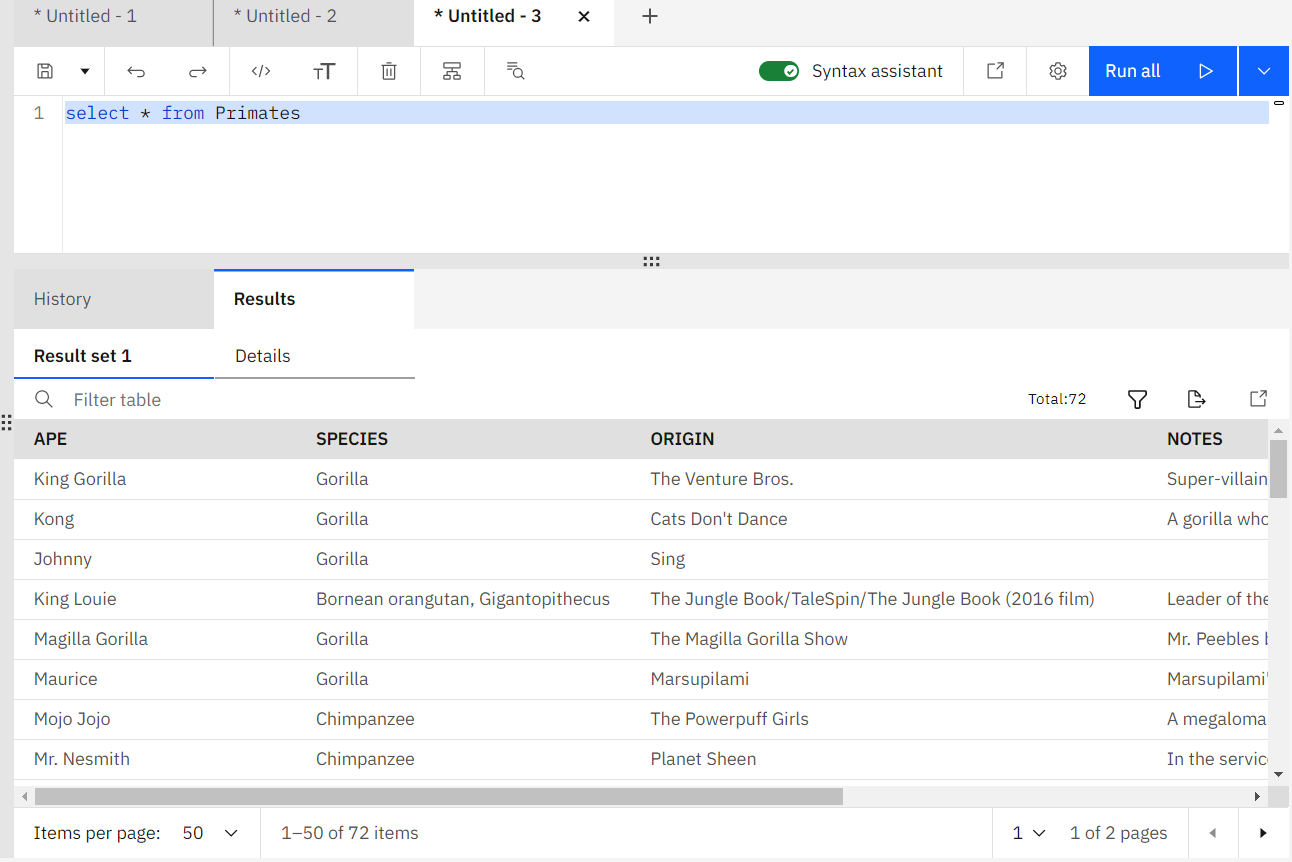

# First Analysis

##### Looking at the data, the first thing I notice is that I don't know two things. One, what year the shows or movies came out and Two, wether they are shows or movies.  I need to add some data.  